In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [2]:
df = pd.read_table('testSet.txt',header = None)
df.columns = ['X1','X2','labels']

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def BGD_LR(df,alpha=0.01,maxCycles=500):
    xMat = np.mat(df.iloc[:,:-1])
    yMat = np.mat(df.iloc[:,-1])

    m,_ = xMat.shape
    xMat = np.column_stack((np.ones(m), xMat))

    # 样本的行和列
    m,n = xMat.shape
    weights = np.zeros((n,1))
    # 最优化算法： 迭代更新

    for i in range(maxCycles):
        h = sigmoid(xMat * weights)
        grad = xMat.T * (h - yMat.T)/m
        weights -= alpha*grad
    return weights

In [5]:
weight1,weight2,weight3 = BGD_LR(df,0.01,500), BGD_LR(df,0.01,5000), BGD_LR(df,0.01,50000)
weight1,weight2,weight3

(array([[ 0.85428423],
        [ 0.10822229],
        [-0.21582062]]),
 array([[ 3.90251978],
        [ 0.46067388],
        [-0.58896607]]),
 array([[ 9.31772343],
        [ 0.87155023],
        [-1.28445609]]))

In [6]:
def regularize(xMat):
    return ;

In [7]:
def plotBestFit(weights):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 1. 原始数据

    ax.scatter(df[df['labels'] == 0]['X1'], df[df['labels'] == 0]['X2'], s=30, c='red', marker='s')
    ax.scatter(df[df['labels'] == 1]['X1'], df[df['labels'] == 1]['X2'], s=30, c='green')

    # 2. 决策边界

    x = np.arange(-3.0, 3.2, 0.1)
    y = (0 - weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


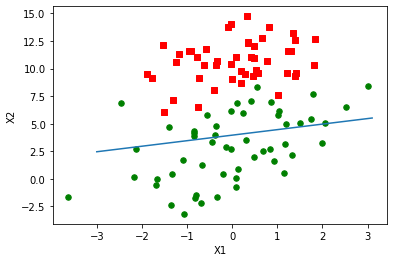

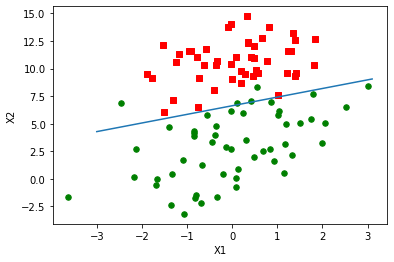

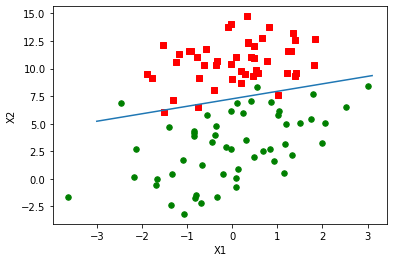

(None, None, None)

In [8]:
plotBestFit(weight1),plotBestFit(weight2),plotBestFit(weight3)